In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor


In [5]:
### Read the file
car_data = pd.read_csv("data/car data.csv",sep=",")

In [6]:
print("Data contains {0} rows and {1} columns".format(car_data.shape[0],car_data.shape[1]))

Data contains 301 rows and 9 columns


In [7]:
## checking NA record count
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
## Summary of data
car_data.describe(include="all")

Car_Name         Year  Selling_Price  Present_Price     Kms_Driven  \
count       301   301.000000     301.000000     301.000000     301.000000   
unique       98          NaN            NaN            NaN            NaN   
top        city          NaN            NaN            NaN            NaN   
freq         26          NaN            NaN            NaN            NaN   
mean        NaN  2013.627907       4.661296       7.628472   36947.205980   
std         NaN     2.891554       5.082812       8.644115   38886.883882   
min         NaN  2003.000000       0.100000       0.320000     500.000000   
25%         NaN  2012.000000       0.900000       1.200000   15000.000000   
50%         NaN  2014.000000       3.600000       6.400000   32000.000000   
75%         NaN  2016.000000       6.000000       9.900000   48767.000000   
max         NaN  2018.000000      35.000000      92.600000  500000.000000   

       Fuel_Type Seller_Type Transmission       Owner  
count        301         301          301  301.000000  
unique         3           2            2         NaN  
top       Petrol      Dealer       Manual         NaN  
freq         239         195          261         NaN  
mean         NaN         NaN          NaN    0.043189  
std          NaN         NaN          NaN    0.247915  
min          NaN         NaN          NaN    0.000000  
25%          NaN         NaN          NaN    0.000000  
50%          NaN         NaN          NaN    0.000000  
75%          NaN         NaN          NaN    0.000000  
max          NaN         NaN          NaN    3.000000

In [9]:
## Checking data types of car
car_data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [10]:
## checking top 10 records to understand
car_data.head(10)

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0           ritz  2014           3.35           5.59       27000    Petrol   
1            sx4  2013           4.75           9.54       43000    Diesel   
2           ciaz  2017           7.25           9.85        6900    Petrol   
3        wagon r  2011           2.85           4.15        5200    Petrol   
4          swift  2014           4.60           6.87       42450    Diesel   
5  vitara brezza  2018           9.25           9.83        2071    Diesel   
6           ciaz  2015           6.75           8.12       18796    Petrol   
7        s cross  2015           6.50           8.61       33429    Diesel   
8           ciaz  2016           8.75           8.89       20273    Diesel   
9           ciaz  2015           7.45           8.92       42367    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
5      Dealer       Manual      0  
6      Dealer       Manual      0  
7      Dealer       Manual      0  
8      Dealer       Manual      0  
9      Dealer       Manual      0

In [11]:
## number of years since car bought
car_data['Current_Year'] = 2021
car_data['No_of_years'] = car_data['Current_Year'] - car_data['Year']

## Drop the columns 
car_data.drop(['Year','Current_Year'],axis=1,inplace=True)

In [12]:
car_data.head(3)

Car_Name  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0     ritz           3.35           5.59       27000    Petrol      Dealer   
1      sx4           4.75           9.54       43000    Diesel      Dealer   
2     ciaz           7.25           9.85        6900    Petrol      Dealer   

  Transmission  Owner  No_of_years  
0       Manual      0            7  
1       Manual      0            8  
2       Manual      0            4

In [13]:
## Correlation data
car_data.corr()

Selling_Price  Present_Price  Kms_Driven     Owner  No_of_years
Selling_Price       1.000000       0.878983    0.029187 -0.088344    -0.236141
Present_Price       0.878983       1.000000    0.203647  0.008057     0.047584
Kms_Driven          0.029187       0.203647    1.000000  0.089216     0.524342
Owner              -0.088344       0.008057    0.089216  1.000000     0.182104
No_of_years        -0.236141       0.047584    0.524342  0.182104     1.000000

<AxesSubplot:>

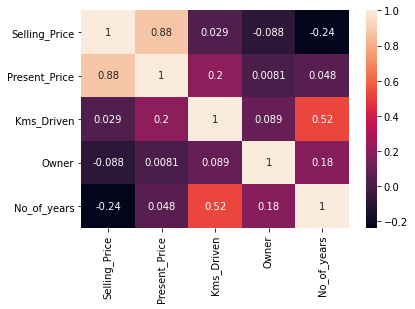

In [14]:
corr_data = car_data.corr()

sns.heatmap(corr_data,annot= True)

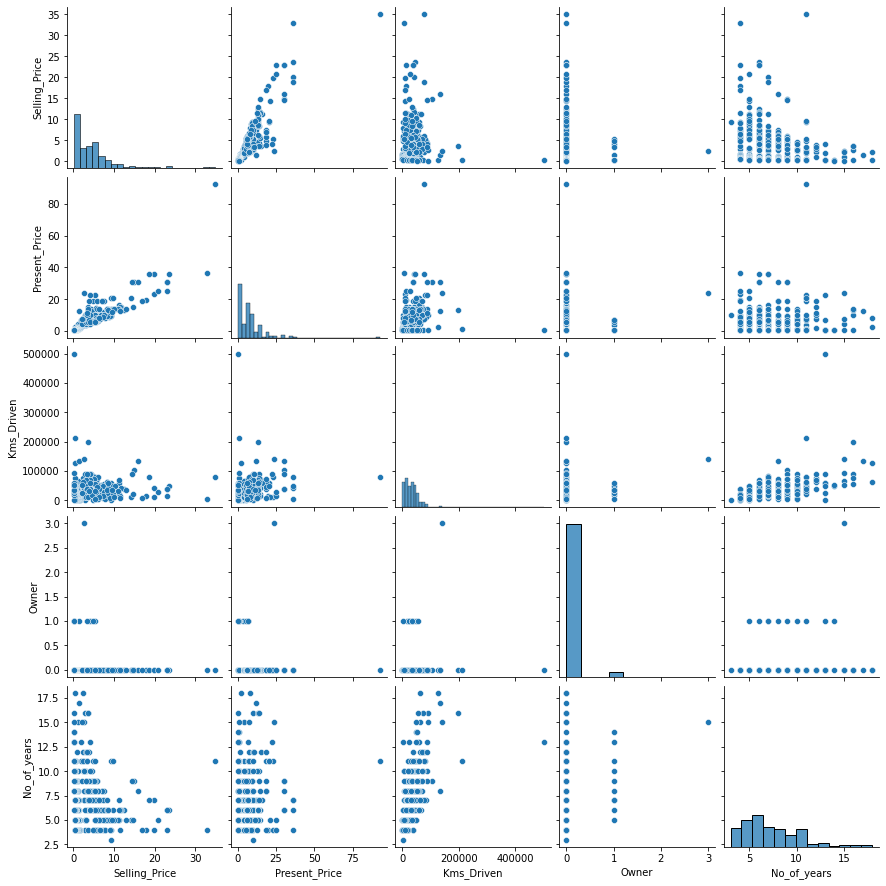

In [15]:
## pairplot
sns.pairplot(car_data)

In [16]:
## Dummify the data
final_data = pd.get_dummies(car_data)

In [17]:
final_data.head(5)

Selling_Price  Present_Price  Kms_Driven  Owner  No_of_years  Car_Name_800  \
0           3.35           5.59       27000      0            7             0   
1           4.75           9.54       43000      0            8             0   
2           7.25           9.85        6900      0            4             0   
3           2.85           4.15        5200      0           10             0   
4           4.60           6.87       42450      0            7             0   

   Car_Name_Activa 3g  Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  \
0                   0                   0                       0   
1                   0                   0                       0   
2                   0                   0                       0   
3                   0                   0                       0   
4                   0                   0                       0   

   Car_Name_Bajaj Avenger 150  ...  Car_Name_vitara brezza  Car_Name_wagon r  \
0                           0  ...                       0                 0   
1                           0  ...                       0                 0   
2                           0  ...                       0                 0   
3                           0  ...                       0                 1   
4                           0  ...                       0                 0   

   Car_Name_xcent  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0               0              0                 0                 1   
1               0              0                 1                 0   
2               0              0                 0                 1   
3               0              0                 0                 1   
4               0              0                 1                 0   

   Seller_Type_Dealer  Seller_Type_Individual  Transmission_Automatic  \
0                   1                       0                       0   
1                   1                       0                       0   
2                   1                       0                       0   
3                   1                       0                       0   
4                   1                       0                       0   

   Transmission_Manual  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  

[5 rows x 110 columns]

In [18]:
## creating dependent and independent variables
X = final_data.iloc[:,1:]
Y = final_data.iloc[:,0]

In [19]:
## feature selection
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [26]:
## Plot feature importance variables
model.feature_importances_
imp_data = pd.DataFrame({"colNames" : X.columns, "values" : model.feature_importances_})
imp_data.values.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

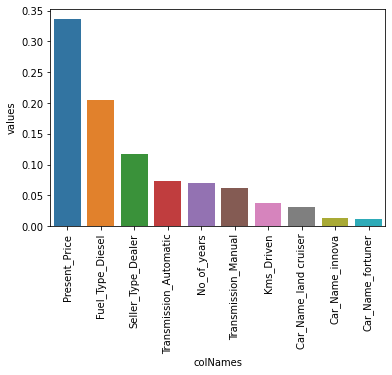

In [37]:
top_imp_data = imp_data.sort_values(by = "values",ascending=False)[:10]

plot = sns.barplot(x="colNames", y="values",data=top_imp_data)

plt.setp(plot.get_xticklabels(), rotation=90)

In [38]:
### Split the data into train and test
from sklearn.model_selection import train_test_split
X_train,  X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state= 42)

In [40]:
### Model 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics 

In [41]:
random_grid = {"n_estimators":[50,100,150,200,250],
                "max_features" : ['auto','sqrt'],
                "max_depth" : [10,15,20,25,30],
                "min_samples_split" : [2,5,9,13],
                "min_samples_leaf" : [1,3,7,9]
}
print(random_grid)

{'n_estimators': [50, 100, 150, 200, 250], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 9, 13], 'min_samples_leaf': [1, 3, 7, 9]}


In [49]:
## Model Creation
rf = RandomForestRegressor()
rf_rnd_grid_cv = RandomizedSearchCV(estimator = rf,param_distributions = random_grid, 
                                    scoring = "neg_mean_squared_error",n_iter = 10,
                                     cv = 5,  verbose = 2, random_state = 14, n_jobs=-1)

In [50]:
## Fit/train the model
rf_rnd_grid_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [51]:
## best parameters
rf_rnd_grid_cv.best_params_

{'n_estimators': 150,
 'min_samples_split': 9,
 'min_samples_leaf': 7,
 'max_features': 'auto',
 'max_depth': 25}

In [52]:
rf_rnd_grid_cv.best_score_

-6.348282406092828

In [53]:
## train and Test data predictions
train_pred = rf_rnd_grid_cv.predict(X_train)
test_pred = rf_rnd_grid_cv.predict(X_test)

In [54]:
## test plot distributions
sns.distplot(Y_test-predictions)

C:\Users\gourisep5474\.conda\envs\mlApproach\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

C:\Users\gourisep5474\.conda\envs\mlApproach\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Selling_Price'>

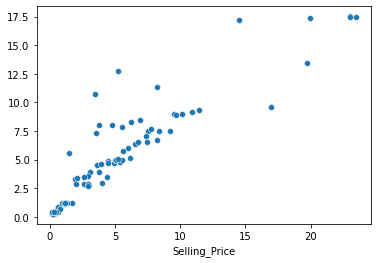

In [55]:
sns.scatterplot(Y_test,predictions)

In [ ]:
### Metrics of model
print("Train Data Metrics")
print("MAE",metrics.mean_absolute_error())